In [1]:
import pandas as pd;

In [2]:
df=pd.read_csv('Hotel Bookings (1).csv')

In [3]:
df.info()#data description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
num_rows = len(df.index)
print(num_rows)

119390


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
num_rows = len(df.index)#Count number of rows
print(num_rows)

87396


In [7]:
#print(df.arrival_date_year.head())
#print(df.arrival_date_month.head())
#print(df.arrival_date_day_of_month.head())

In [8]:
print(df['arrival_date_year'].dtype)
print(df['arrival_date_month'].dtype)
print(df['arrival_date_day_of_month'].dtype)

int64
object
int64


In [10]:
df['Arrival_date']=pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                            df['arrival_date_month'].astype(str) + '-' +
                            df['arrival_date_day_of_month'].astype(str))#merging date,month and year columns

In [11]:
print(df['Arrival_date'].dtype)

datetime64[ns]


In [12]:
#df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis=1,inplace=True)

In [13]:
df['Total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [14]:
print(df['Total_stay'].head())

0    0
1    0
2    1
3    1
4    2
Name: Total_stay, dtype: int64


In [15]:
print(df['stays_in_weekend_nights'].head())
print(df['stays_in_week_nights'].head())

0    0
1    0
2    0
3    0
4    0
Name: stays_in_weekend_nights, dtype: int64
0    0
1    0
2    1
3    1
4    2
Name: stays_in_week_nights, dtype: int64


In [16]:
df.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1,inplace=True)

In [17]:
missing_values=df['children'].isnull().sum()
print(missing_values)
df.dropna(subset=['children'],inplace=True)

4


In [18]:
df['Total_people']=df['adults']+df['children']+df['babies']

In [19]:
df.drop(['babies','adults','children'],axis=1,inplace=True)

In [20]:
num_rows = len(df.index)#Count number of rows
print(num_rows)

87392


In [21]:
df['Total_people']=df['Total_people'].replace(0,'No people')

In [22]:
df.drop(df[df['Total_people']=='No people'].index,inplace=True)

In [23]:
num_rows = len(df.index)#Count number of rows
print(num_rows)

87226


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87226 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87226 non-null  object        
 1   is_canceled                     87226 non-null  int64         
 2   lead_time                       87226 non-null  int64         
 3   arrival_date_year               87226 non-null  int64         
 4   arrival_date_month              87226 non-null  object        
 5   arrival_date_week_number        87226 non-null  int64         
 6   arrival_date_day_of_month       87226 non-null  int64         
 7   meal                            87226 non-null  object        
 8   country                         86779 non-null  object        
 9   market_segment                  87226 non-null  object        
 10  distribution_channel            87226 non-null  object        
 11  is_rep

In [25]:
print(df['is_canceled'].unique())

[0 1]


In [26]:
df.fillna({'agent':'Direct Booking'},inplace=True)

In [27]:
print(df['agent'].head())

0    Direct Booking
1    Direct Booking
2    Direct Booking
3             304.0
4             240.0
Name: agent, dtype: object


In [28]:
#df.drop('company',axis=1,inplace=True)

In [29]:
df.fillna({'country':'Other'},inplace=True)

In [30]:
print(df['hotel'].unique())

['Resort Hotel' 'City Hotel']


In [31]:
df.drop('arrival_date_week_number',axis=1,inplace=True)

In [32]:
df['is_satisfied']=df['reserved_room_type']==df['assigned_room_type']

In [33]:
df['is_satisfied']=df['is_satisfied'].replace(True,'Satisfied')
df['is_satisfied']=df['is_satisfied'].replace(False,'Not satisfied')

In [34]:
df['booking_id']=range(1, len(df) + 1)#index column

In [59]:
#print(df['lead_time'].unique())

In [36]:
import matplotlib as mp
import matplotlib.pyplot as plt

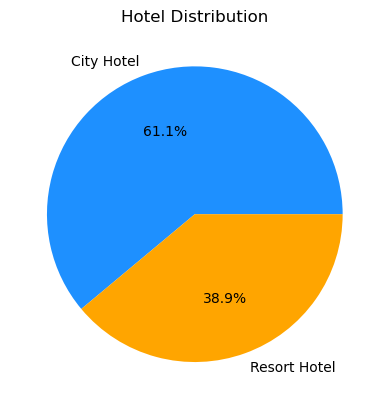

In [37]:
hotel_counts = df["hotel"].value_counts()
label=hotel_counts.index
color=['dodgerblue','orange']
plt.pie(hotel_counts,autopct='%0.1f%%',labels=label,colors=color)
plt.title("Hotel Distribution")
plt.show()

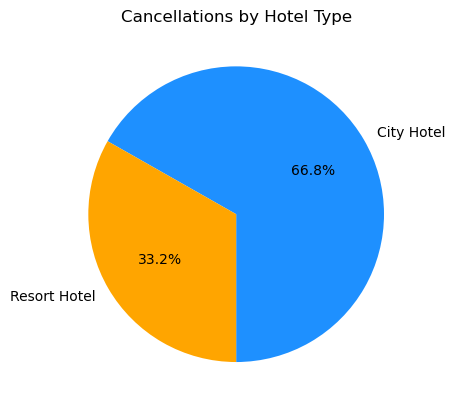

In [38]:
cancellations = df.groupby("hotel")["is_canceled"].sum()
color=['dodgerblue','orange']
plt.pie(cancellations, labels=cancellations.index, autopct="%0.1f%%",startangle=270,colors=color)
plt.title("Cancellations by Hotel Type")
plt.show()

In [367]:
Avg_lead_time=df['lead_time'].median()
print('Average Lead Time =',round(Avg_lead_time),'days')

Average Lead Time = 49 days


In [178]:
Total_Bookings=df['booking_id'].count()
print('Total Bookings=',Total_Bookings)

Total Bookings= 87226


In [192]:
total_cancellations=df['is_canceled'].mean()*100
print('Total cancellations=',round(total_cancellations,2),'%')

Total cancellations= 27.52 %


In [186]:
hotel_counts = df['hotel'].value_counts()
print(hotel_counts)

hotel
City Hotel      53270
Resort Hotel    33956
Name: count, dtype: int64


In [287]:
Avg_stay=df['Total_stay'].mean()
print('Average Stay =',round(Avg_stay),'days ')

Average Stay = 4 days 


In [343]:
Avg_guests=df['Total_people'].mean()
print('Average count of guests=',round(Avg_guests))

Average count of guests= 2


In [194]:
Avg_adr=df['adr'].mean()
print("Average Adr=",round(Avg_adr,2))

Average Adr= 106.52


In [398]:

Total_guests = len(df)
repeated_guests = df['is_repeated_guest'].sum()

retention_rate = (repeated_guests / total_guests) * 100
print("Retention Rate=",round(retention_rate,2),'%')


Retention Rate= 3.86 %


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87226 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87226 non-null  object        
 1   is_canceled                     87226 non-null  int64         
 2   lead_time                       87226 non-null  int64         
 3   arrival_date_year               87226 non-null  int64         
 4   arrival_date_month              87226 non-null  object        
 5   arrival_date_day_of_month       87226 non-null  int64         
 6   meal                            87226 non-null  object        
 7   country                         87226 non-null  object        
 8   market_segment                  87226 non-null  object        
 9   distribution_channel            87226 non-null  object        
 10  is_repeated_guest               87226 non-null  int64         
 11  previo

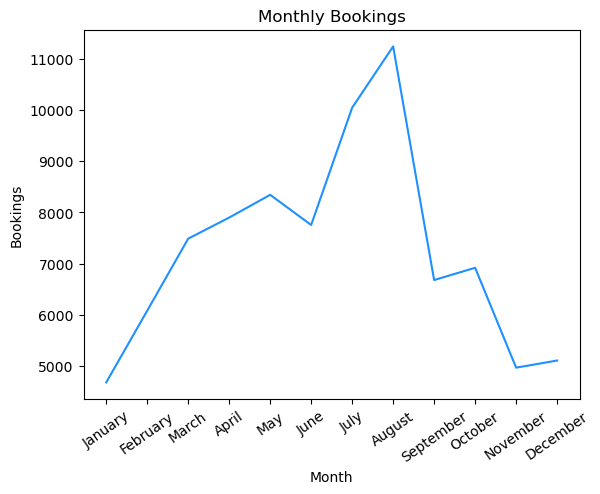

In [65]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
month_count = df['arrival_date_month'].value_counts().reindex(month_order)

plt.plot(month_order,month_count,color='dodgerblue')
plt.title('Monthly Bookings')
plt.xlabel('Month')
plt.ylabel('Bookings')
plt.xticks(rotation=35)
plt.show()

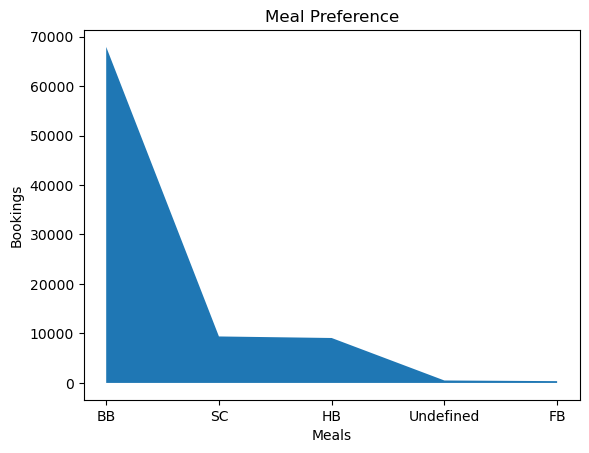

In [370]:
meal=df['meal'].value_counts()
labels=meal.index

plt.fill_between(labels,meal)
plt.title('Meal Preference')
plt.xlabel('Meals')
plt.ylabel('Bookings')
plt.show()


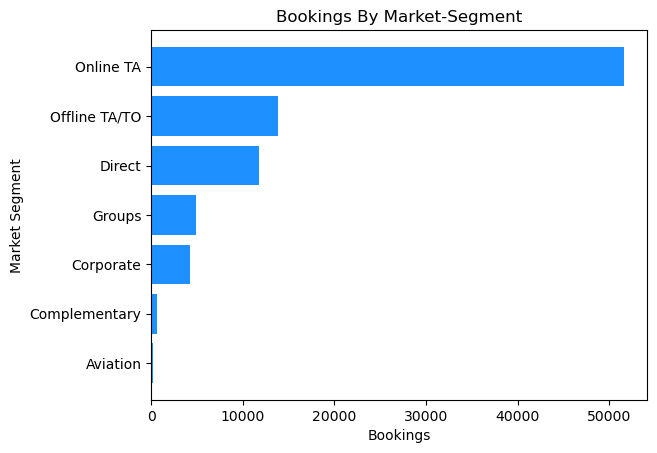

In [67]:
market=df['market_segment'].value_counts(ascending=True)
label=market.index

plt.barh(label,market,color='dodgerblue')
plt.title('Bookings By Market-Segment')
plt.xlabel('Bookings')
plt.ylabel('Market Segment')
plt.show()

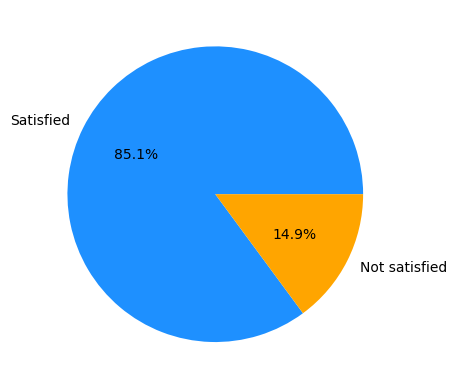

In [61]:
satisfaction=df['is_satisfied'].value_counts()
color=['dodgerblue','orange']
plt.pie(satisfaction,labels=satisfaction.index,autopct='%0.1f%%',colors=color)
plt.show()

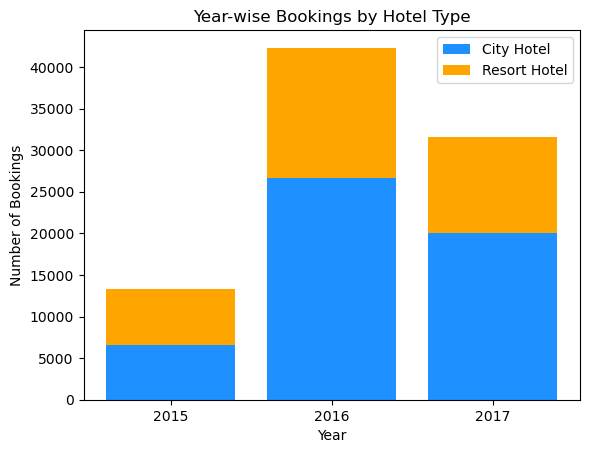

In [62]:
year_hotel_counts = df.groupby(['arrival_date_year', 'hotel']).size().unstack()

years = year_hotel_counts.index
city = year_hotel_counts['City Hotel']
resort = year_hotel_counts['Resort Hotel']

plt.bar(years, city, label='City Hotel', color='dodgerblue')
plt.bar(years, resort, bottom=city, label='Resort Hotel', color='orange')

plt.title('Year-wise Bookings by Hotel Type')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.xticks(years)
plt.legend()
plt.show()


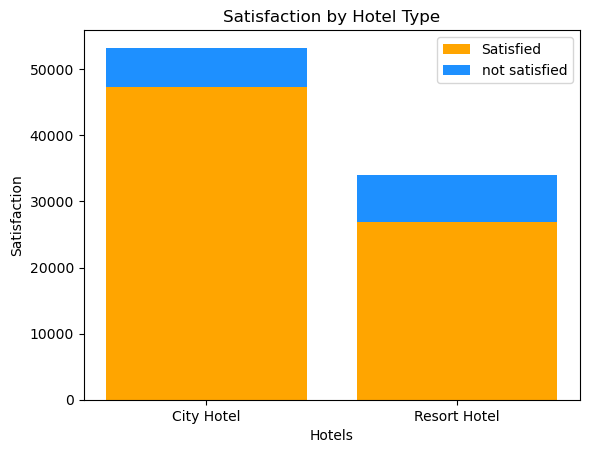

In [39]:
year_hotel_counts = df.groupby(['hotel','is_satisfied']).size().unstack()

years = year_hotel_counts.index
city = year_hotel_counts['Satisfied']
resort = year_hotel_counts['Not satisfied']

plt.bar(years, city, label='Satisfied', color='orange')
plt.bar(years, resort, bottom=city, label='not satisfied', color='dodgerblue')

plt.title('Satisfaction by Hotel Type')
plt.xlabel('Hotels')
plt.ylabel('Satisfactio')
plt.legend()
plt.show()

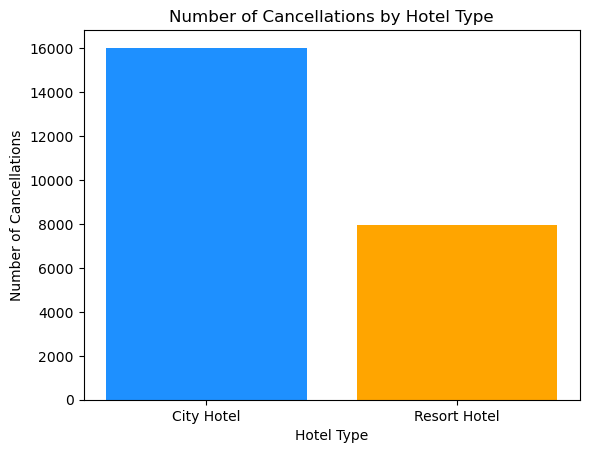

In [47]:
cancel_by_hotel = df.groupby('hotel')['is_canceled'].sum()

plt.bar(cancel_by_hotel.index, cancel_by_hotel.values, color=['dodgerblue', 'orange'])
plt.title('Number of Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Cancellations')
plt.show()

In [48]:
print(df['adr'].unique())

[  0.    75.    98.   ... 266.75 209.25 157.71]


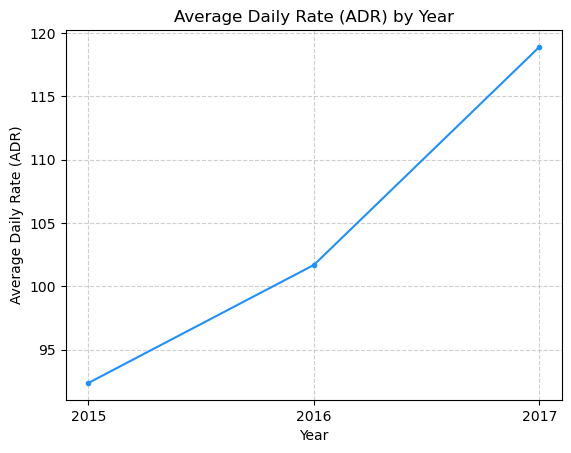

In [62]:
adr_by_year = df.groupby('arrival_date_year')['adr'].mean()

plt.plot(adr_by_year.index, adr_by_year.values, marker='.', linestyle='-', color='dodgerblue')
plt.title("Average Daily Rate (ADR) by Year")
plt.xlabel("Year")
plt.ylabel("Average Daily Rate (ADR)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(adr_by_year.index)
plt.show()
